In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_data = train_data.iloc[:8000]
test_data = test_data.iloc[:2000]

print(train_data.shape)

(8000, 785)


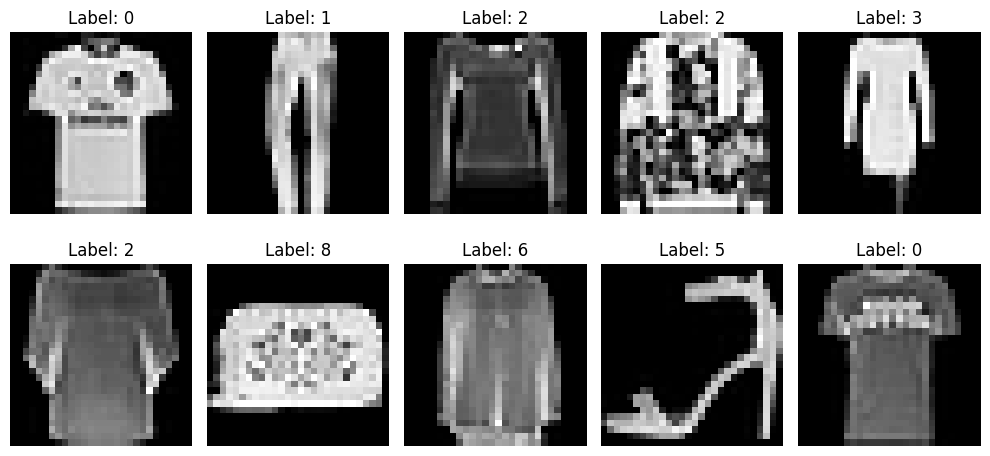

In [3]:
X_train = train_data.iloc[:, 1:].values.astype('float32') / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_data.iloc[:, 0].values

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Define each MLP with a specific activation function
mlp_logistic = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='logistic',
    solver='adam',
    learning_rate_init=2e-5,
    batch_size=128,
    max_iter=1,  # Train one epoch at a time
    warm_start=True,  # Keep weights for incremental training
    random_state=42
)

mlp_tanh = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='tanh',
    solver='adam',
    learning_rate_init=2e-5,
    batch_size=128,
    max_iter=1,
    warm_start=True,
    random_state=42
)

mlp_relu = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=2e-5,
    batch_size=128,
    max_iter=1,
    warm_start=True,
    random_state=42
)

mlp_identity = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='identity',
    solver='adam',
    learning_rate_init=2e-5,
    batch_size=128,
    max_iter=1,
    warm_start=True,
    random_state=42
)

# Initialize dictionaries to store loss values for each model
results = {
    'logistic': {'train_loss': [], 'val_loss': []},
    'tanh': {'train_loss': [], 'val_loss': []},
    'relu': {'train_loss': [], 'val_loss': []},
    'identity': {'train_loss': [], 'val_loss': []}
}

# Train each model separately for multiple epochs
for epoch in range(100):
    for activation, mlp in zip(['logistic', 'tanh', 'relu', 'identity'], 
                               [mlp_logistic, mlp_tanh, mlp_relu, mlp_identity]):
        
        mlp.fit(X_train, y_train)
        
        # Record training loss
        results[activation]['train_loss'].append(mlp.loss_curve_[-1])
        
        # Compute validation loss
        val_predictions = mlp.predict_proba(X_val)
        epoch_val_loss = -np.mean(np.log(val_predictions[np.arange(len(y_val)), y_val] + 1e-9)) # Cross-entropy loss
        results[activation]['val_loss'].append(epoch_val_loss)

best_accuracy = 0
for activation, mlp in zip(['logistic', 'tanh', 'relu', 'identity'], [mlp_logistic, mlp_tanh, mlp_relu, mlp_identity]):
    test_accuracy = mlp.score(X_test, y_test)
    print(f'Test Accuracy with {activation}: {test_accuracy:.4f}')
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_activation_func = activation

print(f'Best Activation Function: {best_activation_func} with Accuracy: {best_accuracy:.4f}')

Test Accuracy with logistic: 0.4410
Test Accuracy with tanh: 0.8305
Test Accuracy with relu: 0.8225
Test Accuracy with identity: 0.8225
Best Activation Function: tanh with Accuracy: 0.8305


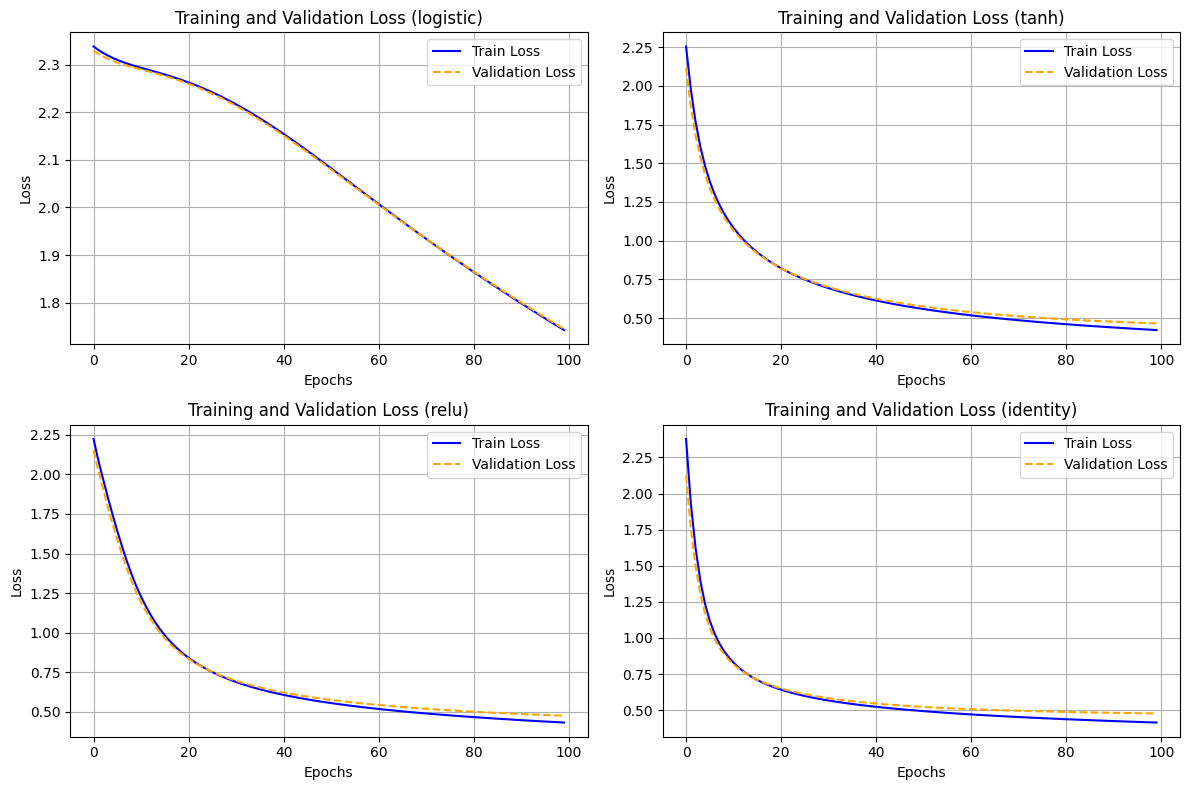

In [6]:
# Plotting the training and validation loss for different activations separately
plt.figure(figsize=(12, 8))
for idx, activation in enumerate(['logistic', 'tanh', 'relu', 'identity'], 1):
    plt.subplot(2, 2, idx)  
    plt.plot(results[activation]['train_loss'], label='Train Loss', color='b')
    plt.plot(results[activation]['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title(f'Training and Validation Loss ({activation})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(128, 64, 32)],
    'activation': [best_activation_func],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [2e-5, 2e-4, 2e-3],
    'batch_size': [64, 128, 256],
    'max_iter': [100, 200]
}

mlp = MLPClassifier(random_state=42)

In [8]:
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'activation': 'tanh', 'batch_size': 256, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.002, 'max_iter': 100, 'solver': 'adam'}
Best Cross-Validation Score: 0.854061077080782


In [9]:
best_mlp = grid_search.best_estimator_
test_accuracy = best_mlp.score(X_test, y_test)

print("Test Accuracy with Best Parameters:", test_accuracy)

Test Accuracy with Best Parameters: 0.855


Part 4

In [10]:
from sklearn.neural_network import MLPRegressor
import numpy as np

a = 64
b = 128
c = 256

hidden_layer_sizes = [c, b, a, b, c]
activation_functions = ['relu', 'identity']
results = {}

# Training with ReLU activation function
mlp_relu = MLPRegressor(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=1,  # Train one epoch at a time
    warm_start=True,  # Keep weights for incremental training
    random_state=42
)

relu_train_loss = []
relu_val_loss = []

print('Training with ReLU activation function...')
for epoch in range(100):
    mlp_relu.fit(X_train, X_train) 
    relu_train_loss.append(mlp_relu.loss_curve_[-1])

    val_predictions = mlp_relu.predict(X_val)  
    epoch_val_loss = np.mean((val_predictions - X_val) ** 2)  # Mean Squared Error
    relu_val_loss.append(epoch_val_loss)
    
    print(f'Epoch: {epoch + 1} - Val Loss: {epoch_val_loss}')

# Training with Identity activation function
mlp_identity = MLPRegressor(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='identity',
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=1,  # Train one epoch at a time
    warm_start=True,  # Keep weights for incremental training
    random_state=42
)

identity_train_loss = []
identity_val_loss = []

print('\nTraining with Identity activation function...')
for epoch in range(100):
    mlp_identity.fit(X_train, X_train)  # Use the images as both input and target
    identity_train_loss.append(mlp_identity.loss_curve_[-1])

    val_predictions = mlp_identity.predict(X_val)  # Output will have the same shape as X_val
    epoch_val_loss = np.mean((val_predictions - X_val) ** 2)  # Mean Squared Error
    identity_val_loss.append(epoch_val_loss)
    
    print(f'Epoch: {epoch + 1} - Val Loss: {epoch_val_loss}')


Training with ReLU activation function...
Epoch: 1 - Val Loss: 0.20576433837413788
Epoch: 2 - Val Loss: 0.19758404791355133
Epoch: 3 - Val Loss: 0.18483765423297882
Epoch: 4 - Val Loss: 0.16777554154396057
Epoch: 5 - Val Loss: 0.14837606251239777
Epoch: 6 - Val Loss: 0.1294800490140915
Epoch: 7 - Val Loss: 0.11249297112226486
Epoch: 8 - Val Loss: 0.09784048050642014
Epoch: 9 - Val Loss: 0.0860334113240242
Epoch: 10 - Val Loss: 0.07698789983987808
Epoch: 11 - Val Loss: 0.0703049823641777
Epoch: 12 - Val Loss: 0.06551250070333481
Epoch: 13 - Val Loss: 0.06195526570081711
Epoch: 14 - Val Loss: 0.0590645857155323
Epoch: 15 - Val Loss: 0.056517332792282104
Epoch: 16 - Val Loss: 0.054152294993400574
Epoch: 17 - Val Loss: 0.051924046128988266
Epoch: 18 - Val Loss: 0.04984574764966965
Epoch: 19 - Val Loss: 0.047954488545656204
Epoch: 20 - Val Loss: 0.04626059532165527
Epoch: 21 - Val Loss: 0.04475283622741699
Epoch: 22 - Val Loss: 0.04341057315468788
Epoch: 23 - Val Loss: 0.042214490473270416


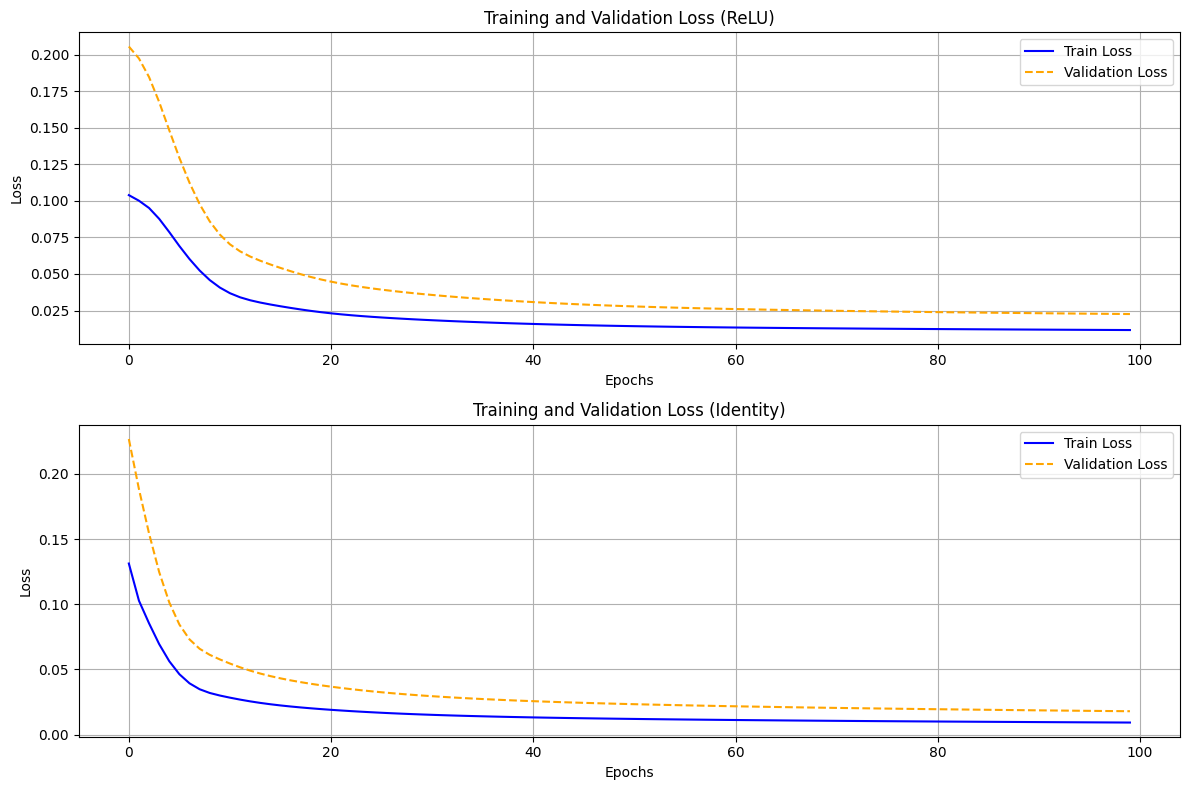

In [11]:
# Plotting the training and validation loss for different activations separately
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)  
plt.plot(relu_train_loss, label='Train Loss', color='b')
plt.plot(relu_val_loss, label='Validation Loss', color='orange', linestyle='--')
plt.title(f'Training and Validation Loss (ReLU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(identity_train_loss, label='Train Loss', color='b')
plt.plot(identity_val_loss, label='Validation Loss', color='orange', linestyle='--')
plt.title(f'Training and Validation Loss (Identity)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

(2000, 784)
(2000, 784)


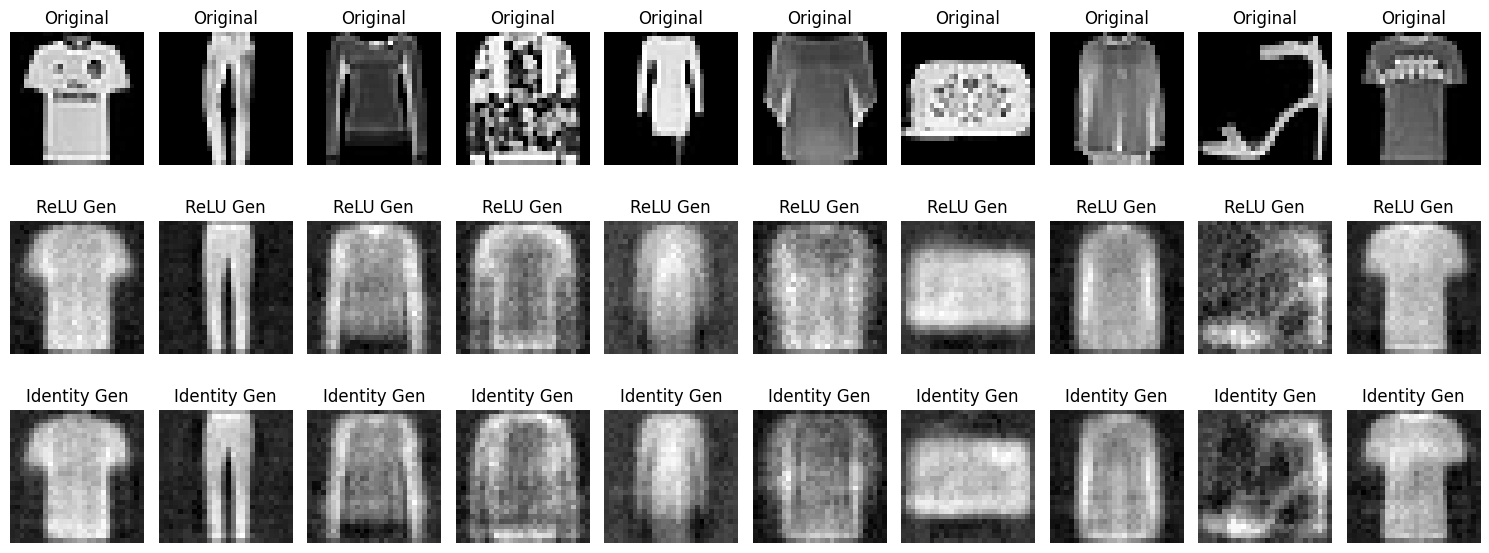

In [12]:
predictions_relu = mlp_relu.predict(X_test)  
predictions_identity = mlp_identity.predict(X_test)  

print(predictions_relu.shape)      
print(predictions_identity.shape)   

def plot_regeneration(original, regenerated_relu, regenerated_identity, n_samples=10):
    plt.figure(figsize=(15, 6))
    for i in range(n_samples):
        plt.subplot(3, n_samples, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Original')

        plt.subplot(3, n_samples, i + n_samples + 1)
        plt.imshow(regenerated_relu[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('ReLU Gen')

        plt.subplot(3, n_samples, i + 2 * n_samples + 1)
        plt.imshow(regenerated_identity[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Identity Gen')

    plt.tight_layout()
    plt.show()

n_samples = 10
plot_regeneration(X_test[:n_samples], predictions_relu[:n_samples], predictions_identity[:n_samples])

In [13]:
from sklearn.metrics import accuracy_score

def extract_feature_vector(model, data, function, layer_index=2):
    activations = data
    for i in range(layer_index + 1):
        activations = activations @ model.coefs_[i] + model.intercepts_[i]
        if function == 'relu':
            activations = np.maximum(activations, 0)
    return activations

# Extract feature vectors of size `a` for training and validation sets
relu_train_features = extract_feature_vector(mlp_relu, X_train, function='relu')
relu_test_features = extract_feature_vector(mlp_relu, X_test, function='relu')

identity_train_features = extract_feature_vector(mlp_identity, X_train, function='identity')
identity_test_features = extract_feature_vector(mlp_identity, X_test, function='identity') 

# Train smaller MLP classifiers with extracted features
mlp_classifier_relu = MLPClassifier(
    hidden_layer_sizes=(a, a),
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=200,
    random_state=42
)

mlp_classifier_identity = MLPClassifier(
    hidden_layer_sizes=(a, a),
    solver='adam',
    learning_rate_init=2e-5,
    max_iter=200,
    random_state=42
)

# Fit the classifiers on the ReLU features
mlp_classifier_relu.fit(relu_train_features, y_train)
relu_predictions = mlp_classifier_relu.predict(relu_test_features)
relu_accuracy = accuracy_score(y_test, relu_predictions)
print(f"ReLU MLP Classifier Accuracy: {relu_accuracy:.4f}")

# Fit the classifiers on the identity features
mlp_classifier_identity.fit(identity_train_features, y_train)
identity_predictions = mlp_classifier_identity.predict(identity_test_features)
identity_accuracy = accuracy_score(y_test, identity_predictions)
print(f"Identity MLP Classifier Accuracy: {identity_accuracy:.4f}")

ReLU MLP Classifier Accuracy: 0.7450
Identity MLP Classifier Accuracy: 0.8005
